In [1]:
import numpy as np
import matplotlib.pyplot as plt

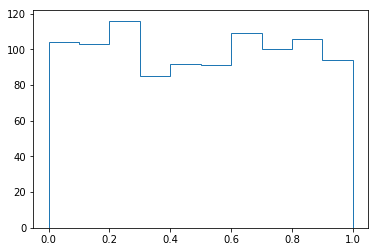

In [2]:
norm = 100.
bins = 10
hrange = [0.,1.]
ntgt = 1000
tgt = np.random.uniform(size=ntgt)
htgt, edges, _ = plt.hist(tgt, histtype='step', bins=bins, range=hrange)
plt.show()

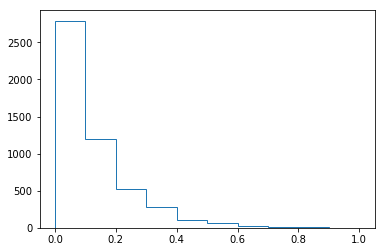

In [3]:
nsrc1 = 5000
src1 = np.random.exponential(size=nsrc1)
src1 /= src1.max()
hsrc1, _, _ = plt.hist(src1, histtype='step', bins=bins, range=hrange)
plt.show()

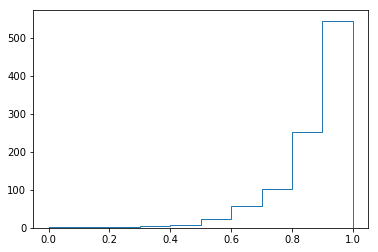

In [4]:
nsrc2 = 1000
src2 = np.random.exponential(size=nsrc2)
src2 /= src2.max()
src2 = 1.-src2
hsrc2, _, _ = plt.hist(src2, histtype='step', bins=bins, range=hrange)
plt.show()

('flo-nom, pre:', 0.8333333333333334)
('flo-usr, pre:', 0.8333333333333334)
(array([10.4, 10.3, 11.6,  8.5,  9.2,  9.1, 10.9, 10. , 10.6,  9.4]), 100.0)
(array([46.56666667, 19.93333333,  8.68333333,  4.81666667,  1.85      ,
        1.36666667,  1.46666667,  1.85      ,  4.31666667,  9.15      ]), 100.0)
[0.22333572 0.51672241 1.33589251 1.76470588 4.97297297 6.65853659
 7.43181818 5.40540541 2.45559846 1.0273224 ]


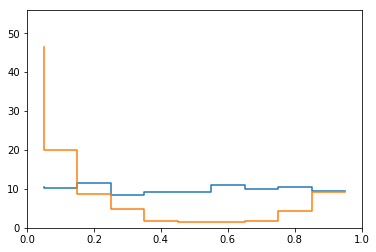

In [40]:
#f1 = 0.5
fnorm = 1.*nsrc1/(1.*nsrc1+nsrc2)
f1 = fnorm
#f1 = 0.2
print('flo-nom, pre:',fnorm)
print('flo-usr, pre:',f1)
hsrc1 = norm*hsrc1/hsrc1.sum()
hsrc2 = norm*hsrc2/hsrc2.sum()
hsrc = hsrc1*f1 + hsrc2*(1.-f1)
htgt = norm*htgt/htgt.sum()
print(htgt, htgt.sum())
print(hsrc, hsrc.sum())
print(htgt/hsrc)
#print(hsrc1, hsrc1.sum())
#print(hsrc2, hsrc2.sum())
plt.step(edges[:-1]+0.05, htgt)
plt.step(edges[:-1]+0.05, hsrc)
plt.xlim(hrange)
plt.ylim(0.,hsrc.max()*1.2)
plt.show()

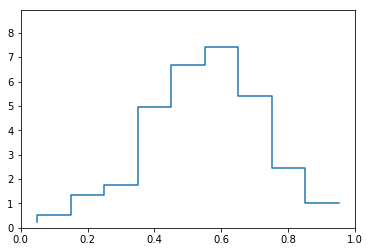

In [41]:
ratios = htgt/hsrc
plt.step(edges[:-1]+0.05, ratios)
plt.xlim(hrange)
plt.ylim(0.,ratios.max()*1.2)
plt.show()

In [42]:
print(edges)
print(ratios)
def get_wgt(x):
    if x >= edges[-1]:
        return ratios[-1]
    else:
        i = np.argwhere(x < edges)[0] - 1
        #print(i)
        return ratios[i][0]

x = 0.1
get_wgt(x)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.22333572 0.51672241 1.33589251 1.76470588 4.97297297 6.65853659
 7.43181818 5.40540541 2.45559846 1.0273224 ]


0.5167224080267558

3631.318947813773
2368.681052186253
('flo-usr, post:', 0.6052198246356263)


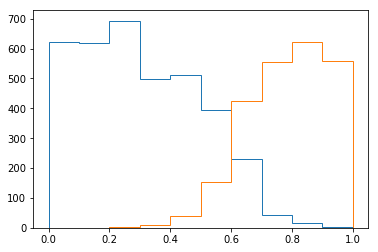

In [43]:
hsrc1_rwgt, _, _ = plt.hist(src1, histtype='step', bins=bins, range=hrange, weights=[get_wgt(x) for x in src1])
print(hsrc1_rwgt.sum())
hsrc2_rwgt, _, _ = plt.hist(src2, histtype='step', bins=bins, range=hrange, weights=[get_wgt(x) for x in src2])
print(hsrc2_rwgt.sum())
flo_ptrwgt = hsrc1_rwgt.sum()/(hsrc1_rwgt.sum()+hsrc2_rwgt.sum())
#print('flo-nom, post:',fnorm)
print('flo-usr, post:',flo_ptrwgt)
plt.show()

('flo-usr, post:', 0.6052198246356263)


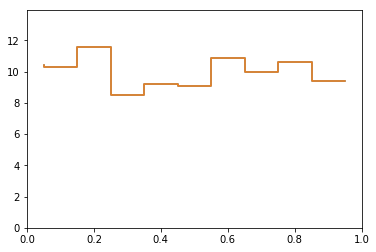

In [44]:
hsrc1_rwgt = norm*hsrc1_rwgt/hsrc1_rwgt.sum()
hsrc2_rwgt = norm*hsrc2_rwgt/hsrc2_rwgt.sum()
#hsrc1_rwgt /= fnorm
#hsrc2_rwgt /= (1.-fnorm)
hsrc1_rwgt = (f1/fnorm)*flo_ptrwgt*hsrc1_rwgt
hsrc2_rwgt = ((1.-f1)/(1.-fnorm))*(1.-flo_ptrwgt)*hsrc2_rwgt
hsrc_rwgt = hsrc1_rwgt+hsrc2_rwgt
print('flo-usr, post:',hsrc1_rwgt.sum()/(hsrc1_rwgt.sum()+hsrc2_rwgt.sum())) 
# ('flo-usr, post:', 0.5476911183014491)
# ('flo-usr, post:', 0.6414194232282492)
plt.step(edges[:-1]+0.05, hsrc_rwgt)
plt.step(edges[:-1]+0.05, htgt*hsrc_rwgt.sum()/htgt.sum())
plt.xlim(hrange)
plt.ylim(0.,hsrc_rwgt.max()*1.2)
plt.show()

(1.0350334587902996e-05, 1.0)
(0.0, 0.9999798204785042)
6000.000000000001
(1.0000000000000002, 2.5329522587290585)


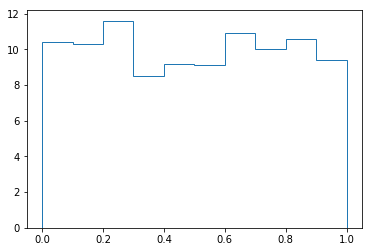

[10.4 10.3 11.6  8.5  9.2  9.1 10.9 10.  10.6  9.4]


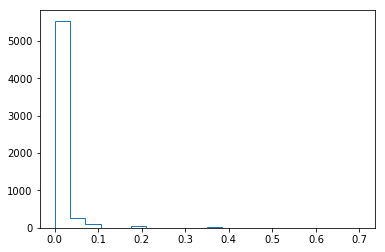

In [10]:
src = np.concatenate([src1, src2])
print(src1.min(), src1.max())
print(src2.min(), src2.max())
#wgts = np.ones_like(src)
wgts = np.concatenate([[get_wgt(x)*f1/fnorm for x in src1], [get_wgt(x)*(1.-f1)/(1-fnorm) for x in src2]])
#wgts = np.concatenate([[get_wgt(x) for x in src1], [get_wgt(x) for x in src2]])
print(wgts.sum())
print(wgts.mean(), wgts.std()) #(1.0, 1.9599411054534963) vs (1.0, 2.951812504818832)
wgts *= norm/wgts.sum()
hsrc_combo, _, _ = plt.hist(src, histtype='step', bins=bins, range=hrange, weights=wgts)
plt.show()
print(hsrc_combo)
plt.hist(wgts, histtype='step', bins=bins*2)
plt.show()